In [1]:
#Discussion Related With Outliers And Impact On Machine Learning!!

#Which Machine Learning Models Are Sensitive To Outliers?

#1.Naivye Bayes Classifier                ----->  Not Sensitive To Outliers
#2.SVM                                    ----->  Not Sensitive To Outliers
#3.Linear Regression                      ----->  Sensitive To Outliers
#4.Logistic Regression                    ----->  Sensitive To Outliers
#5.Decision Tree Regressor or Classifier  ----->  Not Sensitive To Outliers
#6.Ensemble(RF,XGboost,GB)                ----->  Not Sensitive To Outliers
#7.KNN                                    ----->  Not Sensitive To Outliers
#8.Kmeans                                 ----->  Sensitive To Outliers
#9.Hierarichal                            ----->  Sensitive To Outliers
#10.PCA                                   ----->  Sensitive To Outliers
#11.Neural Networks                       ----->  Sensitive To Outliers

In [2]:
import pandas as pd

df = pd.read_csv('E:/datafiles/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df['Age'].isnull().sum()

177

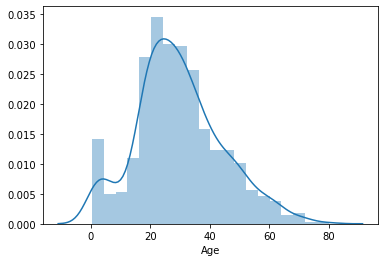

In [4]:
import seaborn as sns
#This looks quite similar to normal distribution after dropping NAN values.

sns.distplot(df['Age'].dropna())

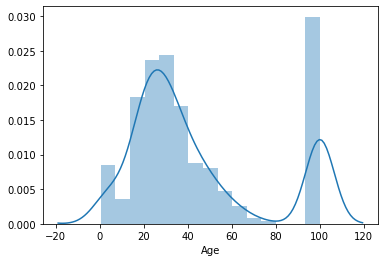

In [5]:
#Now we are filling the NAN value with 100 which causes an outlier.

sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passenger')

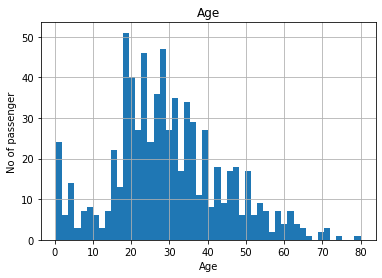

In [6]:
#When ever we have a dataset which is normally distributed we use a technique called Extreme value anaysis.
#or Estimate outliers.We bascially apply a different formula called IQR i.e Inter_Quartile_Range.
#But if our dataset is skewed we will apply different techniques.

#Gaussian Distributed:-
#The data is normally distributed.

figure = df.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

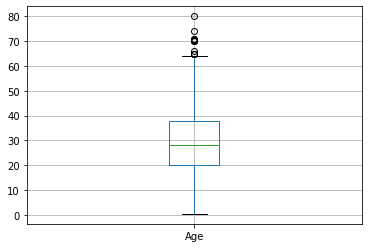

In [7]:
#If we really want to find the outliers then we will use the box_plot.

figure = df.boxplot(column = "Age")

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
#If The Data Is Normally Distributed We use this:-

#Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the
#outliers,use the below step upto Normally Distributed data.

uppper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

In [10]:
#Lets compute the Interquantile range to calculate the boundaries.
#From this step it will be used when data is skewed.

IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [11]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [12]:
#If you want to consider Extreme outliers multiply with 3 instead of 1.5:-

lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

Text(0, 0.5, 'No of passenger')

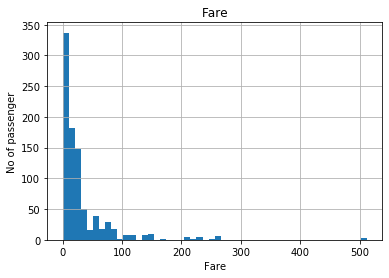

In [13]:
#If Features Are Skewed We Use the below Technique:-

figure = df.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

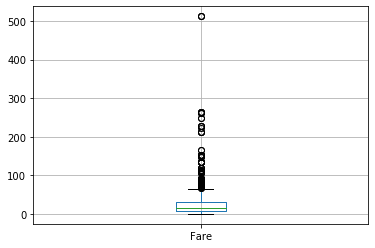

In [14]:
df.boxplot(column="Fare")

In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
#Lets compute the Interquantile range to calculate the boundaries 
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [17]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [18]:
#If you want to consider Extreme outliers multiply with 3 instead of 1.5:-

lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [19]:
data = df.copy()

In [20]:
data.loc[data['Age'] >= 73,'Age'] = 73

In [21]:
data.loc[data['Fare'] >= 100,'Fare'] = 100

Text(0, 0.5, 'No of passenger')

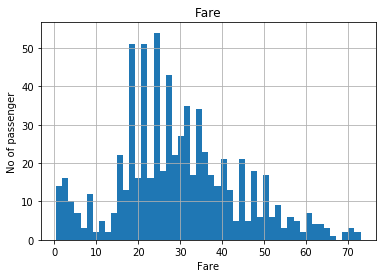

In [22]:
figure = data.Age.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

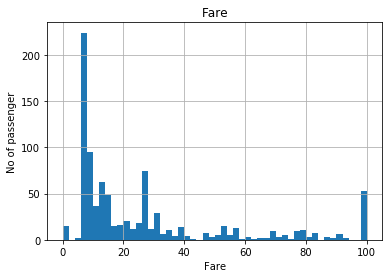

In [23]:
figure = data.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [25]:
#Logistic Regression:-

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6492537313432836
roc_auc_score: 0.7193223443223442


In [26]:
#RandomForestClassifier:-

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6529850746268657
roc_auc_score: 0.7173477564102564
